<a href="https://colab.research.google.com/github/LMarvicsin/QL_CaseStudy_2021/blob/main/QL_DSA_CaseStudy_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSA Case Study: Bank Marketing Data Set

February 26,2021

Lindsey Marvicsin

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Normalizer


In [3]:
!ls "/content/drive/My Drive/data"

'DSA Data Set.csv'


In [4]:
path = "/content/drive/My Drive/data/DSA Data Set.csv"
base_df = pd.read_csv(path)
base_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes


Reviewing the current dataframe and it's contents,
Assumption made: each row is a unique client instance, no duplicate duplicate rows exist. 

In [5]:
base_df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

In [6]:
base_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [7]:
base_df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Checking for null values

In [8]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [9]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

base_df['emp.var.rate'] = base_df['emp.var.rate'].astype(np.int64)
base_df['cons.price.idx'] = base_df['cons.price.idx'].astype(np.int64)
base_df['cons.conf.idx'] = base_df['cons.conf.idx'].astype(np.int64)
base_df['euribor3m'] = base_df['euribor3m'].astype(np.int64)
base_df['nr.employed'] = base_df['nr.employed'].astype(np.int64)
base_df['ModelPrediction'] = base_df['ModelPrediction'].astype(np.int64)


Reviewing the number of times contacted during marketing campaign.

In [10]:
campaign_df1 = base_df

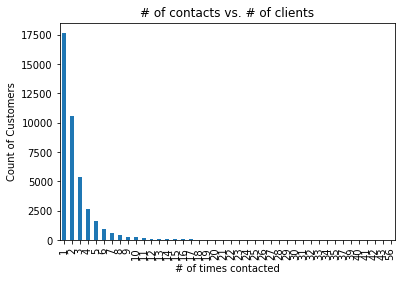

In [11]:
campaign_df1.groupby('campaign',).size().plot(kind='bar')
plt.xlabel('# of times contacted')
plt.ylabel('Count of Customers')
plt.title('# of contacts vs. # of clients')
plt.show()

Focusing on clients that were contacted 5 times or less.

In [12]:
top_five = campaign_df1[campaign_df1['campaign'] < 6]
top_five

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes


Evaluating conversion of # of times contacted to receiving a Term Deposit.

In [13]:
deposit_df = top_five

In [14]:
deposit_df["y"].replace('yes',1, inplace = True )

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
deposit_df["y"].replace('no',0, inplace = True )

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Visualizing categorical information that results in "Term deposit"

Segmenting Model Prediction column in the data set, called prediction level 

In [16]:
deposit_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
count,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000
mean,40.007142,263.432717,1.941751,960.176653,0.181785,0.028646,93.560179,-40.485398,3.569125,5164.639314,0.883260,0.117821
std,10.458787,259.254134,1.125077,192.472059,0.506630,1.583386,0.581213,4.693541,1.748335,73.031312,0.128068,0.322401
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174,0.000000
25%,32.000000,107.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.853045,0.000000
50%,38.000000,185.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.943960,0.000000
75%,47.000000,324.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.957986,0.000000
max,98.000000,4918.000000,5.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.979897,1.000000


In [17]:
segments = [0, .50, .85, .90, pd.np.inf]
labels = ['Poor','Fair','Good','Excellent']
prediction_group = pd.cut(deposit_df.ModelPrediction, segments, labels=labels)
deposit_df['prediction_group'] = prediction_group
deposit_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,prediction_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0,Excellent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0,Excellent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0,Excellent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0,Excellent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0,Excellent


Facet Grid - Campaign, Deposit Outcome, and Prediction Groups.

Displaying the counts for each campaign, split by prediction group and deposit.

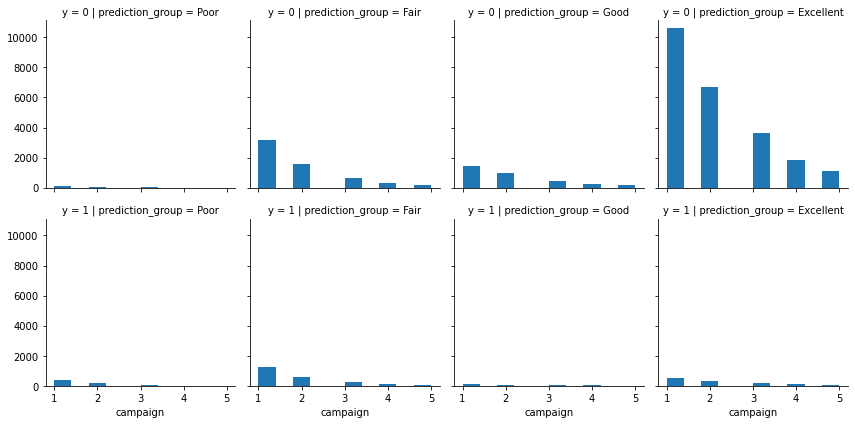

In [18]:
g= sns.FacetGrid( deposit_df, col= "prediction_group", row= "y")
g.map(plt.hist, "campaign")

Visualization above shows that for the most frequent outcome for all 5 campaigns, is an "excellent" prediction, where no deposit was received. In on what factors comprised the "excellent" where a deposit was received.


In [19]:
excellent_deposits = deposit_df[deposit_df['prediction_group'] == 'Excellent'] 


In [20]:
excellent_deposits2 = excellent_deposits[excellent_deposits['y'] == 1] 
excellent_deposits2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,prediction_group
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.957838,1,Excellent
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945808,1,Excellent
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.935969,1,Excellent
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.949826,1,Excellent
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.960481,1,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34737,28,blue-collar,single,basic.9y,unknown,no,no,cellular,may,thu,884,3,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0.907995,1,Excellent
35072,33,blue-collar,married,basic.9y,unknown,yes,no,cellular,may,fri,730,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0.904724,1,Excellent
35174,37,services,married,basic.6y,unknown,yes,no,cellular,may,fri,679,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0.901072,1,Excellent
35182,51,blue-collar,married,basic.9y,unknown,no,no,cellular,may,fri,830,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0.904889,1,Excellent


Below, I create a heatmap to see if there are any clear correlations in the numerical data.

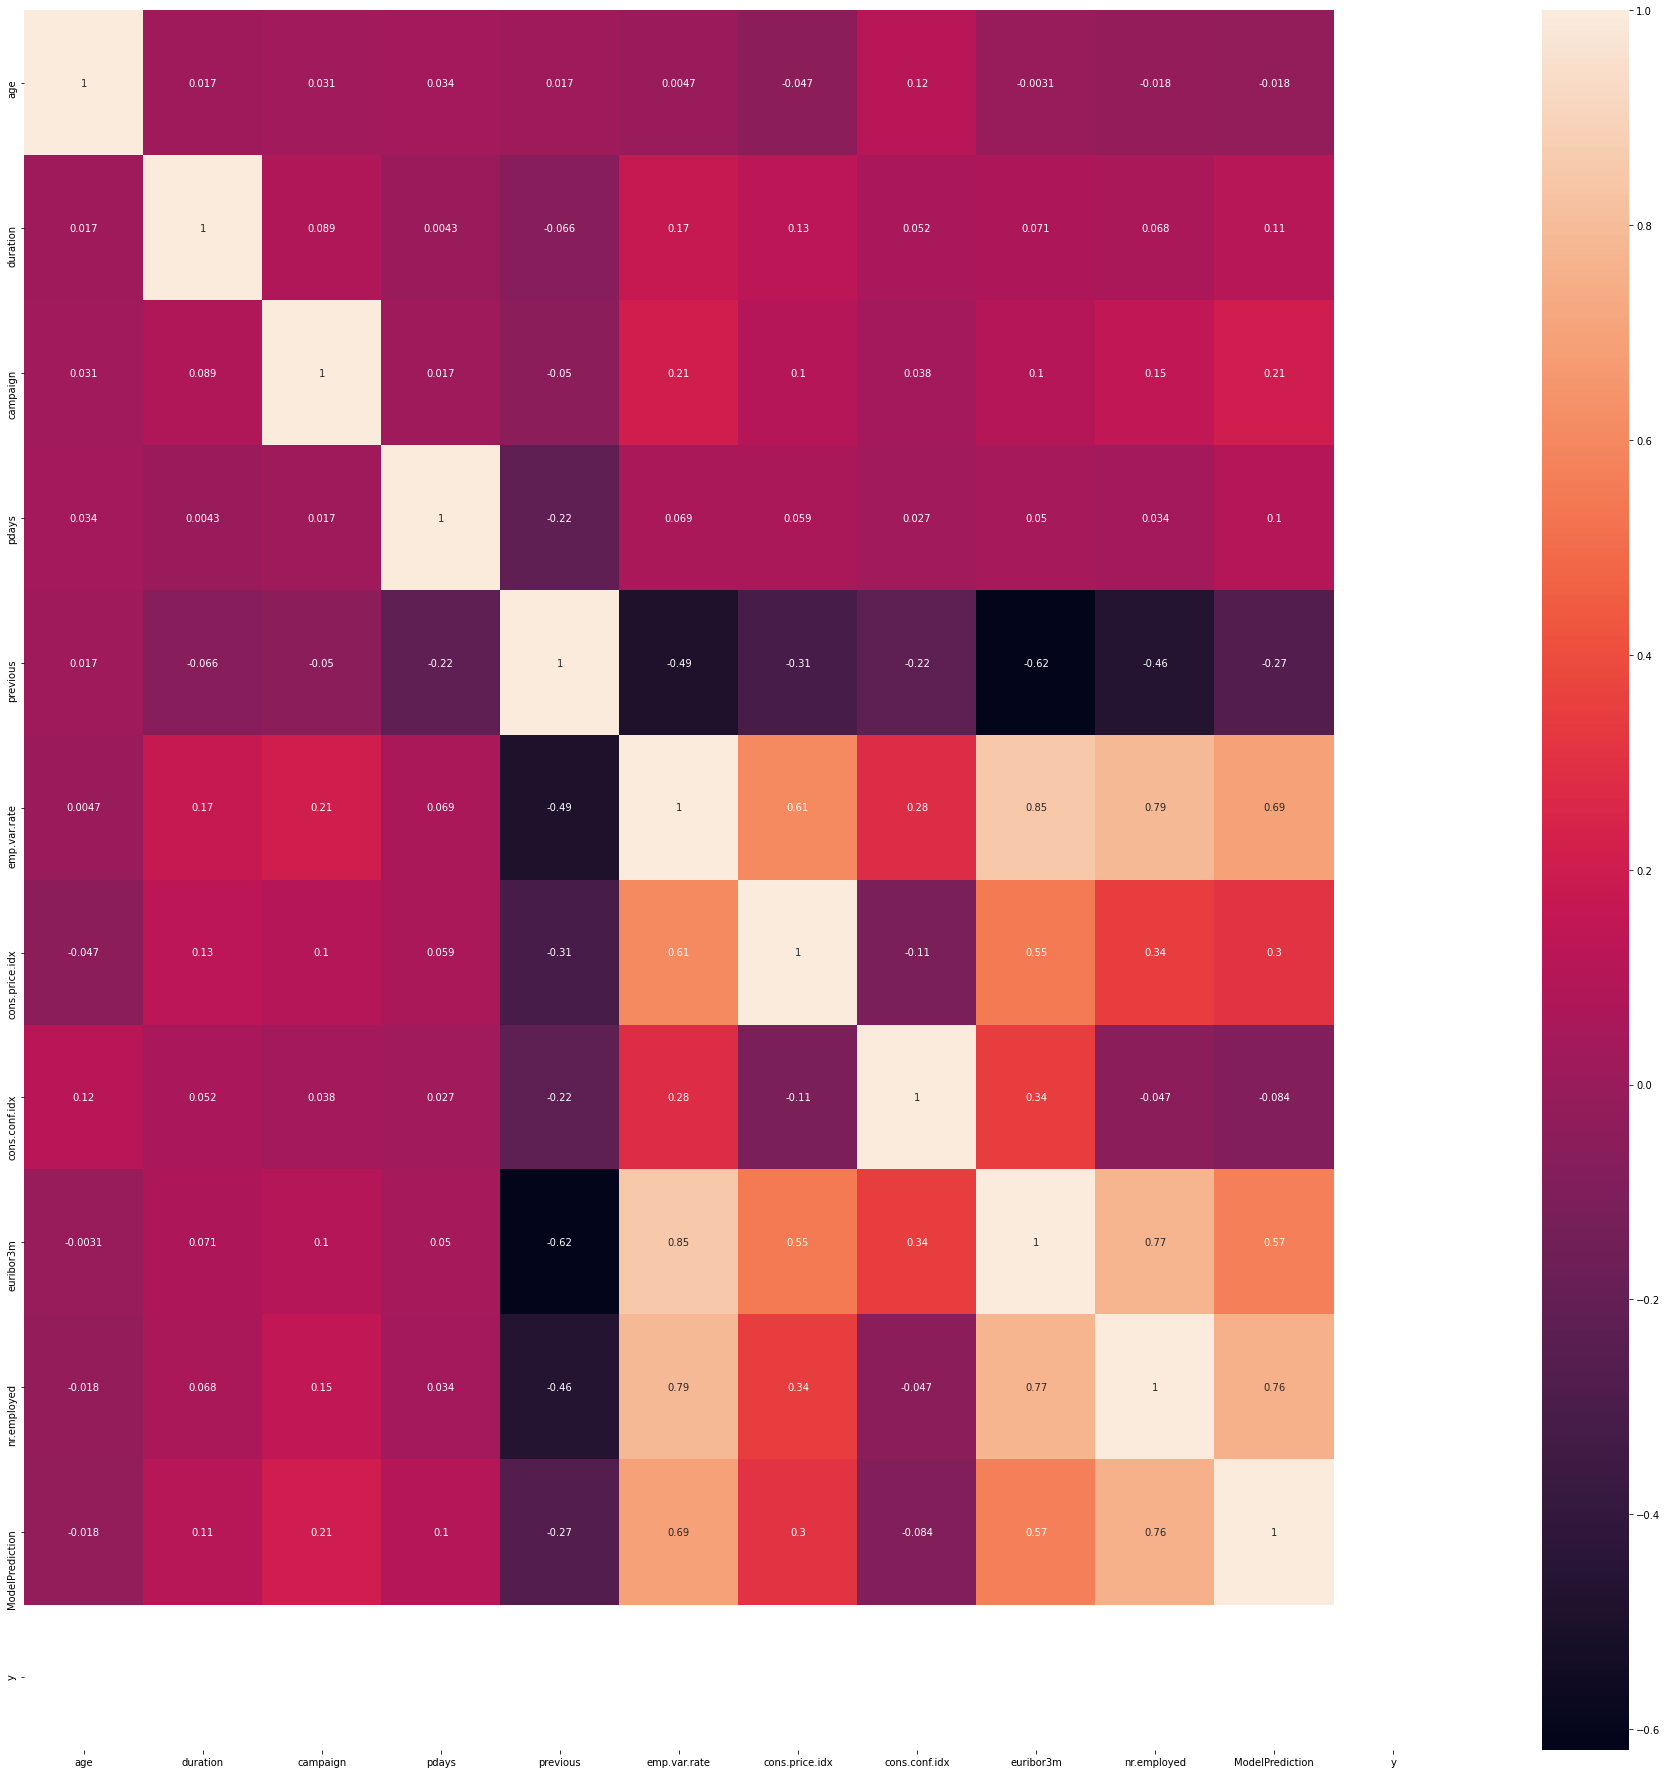

In [21]:
plt.subplots(figsize=(32,32))
sns.heatmap(excellent_deposits2.corr(), annot = True)

The visualization above, did not show any correlations stronger than .85 between the variables. So I dive deeper into what makes up each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29d71f7810>,
      dtype=object)

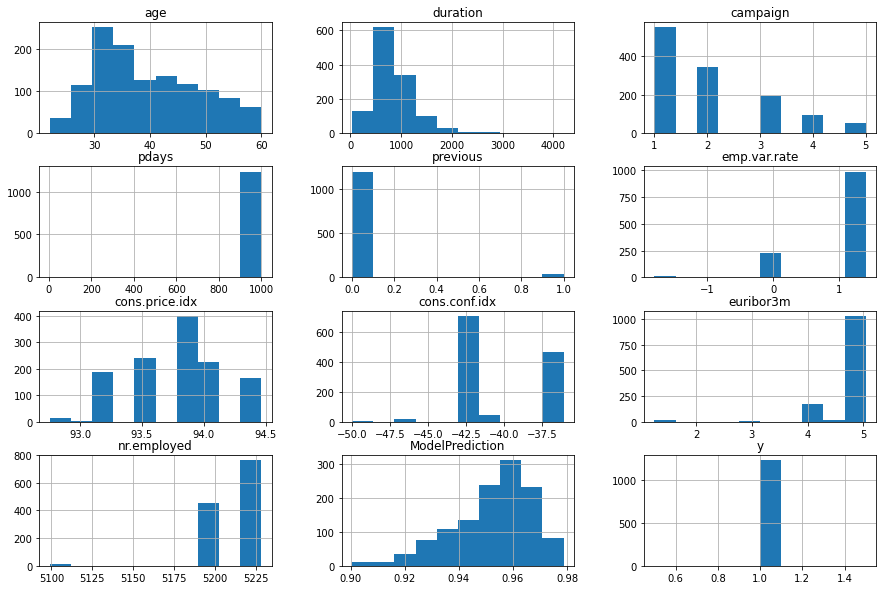

In [22]:
excellent_deposits2.hist(bins=10, figsize= (15,10))

In the plots above we can see clear distributions around age, duration, cons.price index, and model prediction. 


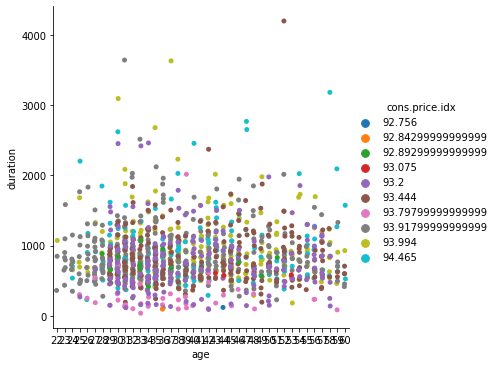

In [23]:
sns.catplot(x="age", y="duration", hue="cons.price.idx", data=excellent_deposits2)

From the diagram above, I am able to see that the duration for each of the deposits are spread pretty evenly across age, the consumer price index had a clear association with the length of the call. (i.e. apparently 93.79799999999 lead to shorter call times)

*Because the duration, is a factor that is not known before the call is performed. If I were to run a logistic regession model, on all of the instances where a deposit was received, i would not include this factor.*

Reviewing the categorical factors, based on the outcome of previous campaigns.

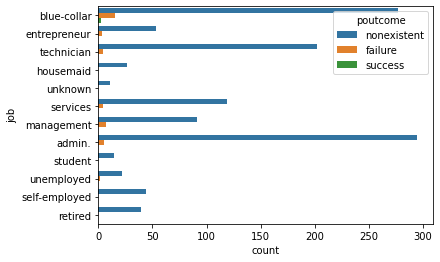

In [24]:
sns.countplot(y="job", hue="poutcome", data=excellent_deposits2)

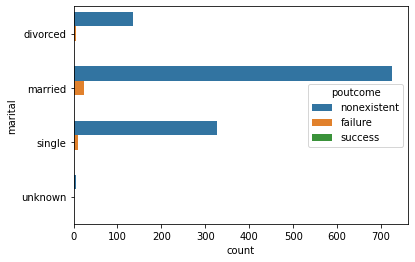

In [25]:
sns.countplot(y="marital", hue="poutcome", data=excellent_deposits2)

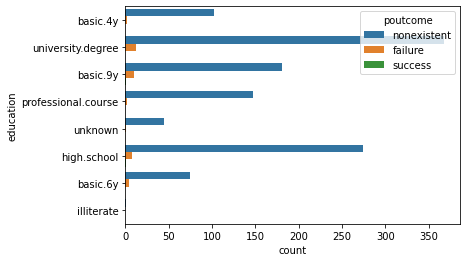

In [26]:
sns.countplot(y="education", hue="poutcome", data=excellent_deposits2)

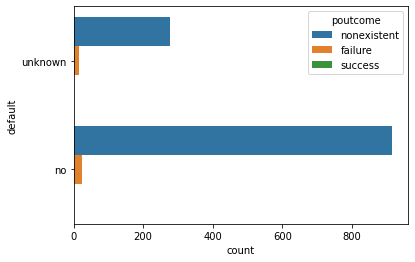

In [27]:
sns.countplot(y="default", hue="poutcome", data=excellent_deposits2)

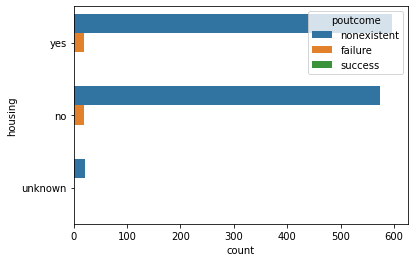

In [28]:
sns.countplot(y="housing", hue="poutcome", data=excellent_deposits2)

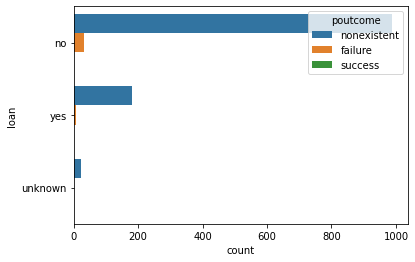

In [29]:
sns.countplot(y="loan", hue="poutcome", data=excellent_deposits2)

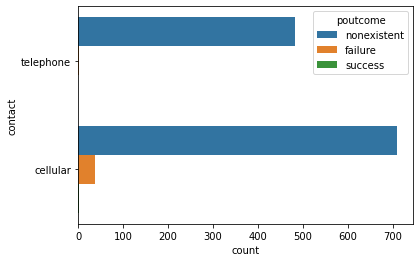

In [30]:
sns.countplot(y="contact", hue="poutcome", data=excellent_deposits2)

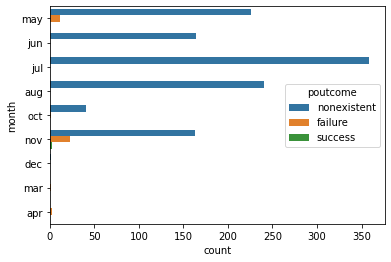

In [31]:
sns.countplot(y="month", hue="poutcome", data=excellent_deposits2)

While, it seems most majority of the deposits came from clients who were classified as "non-exsistent" in the previous marketing campaign. 

Reviewing these, there are definitely some categorical items i would like to dig into further to see if there is something to find (i.e. job, marital status, education and month)

As it is, i would have to create "dummy" values for categorical variables. To use these values in predictive models.



Modeling with strictly numerical values.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [33]:
deposit_numbers = deposit_df.select_dtypes(exclude='object')
deposit_numbers = deposit_numbers.select_dtypes(exclude='category')
deposit_numbers = deposit_numbers.drop(['duration','ModelPrediction'],axis=1)
deposit_numbers

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [34]:
X = deposit_numbers.iloc[:,[0,5]].values
Y = deposit_numbers.iloc[:,[9]].values

In [35]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size =0.30, random_state=1)

In [36]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [37]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state =1)
classifier.fit(X_Train,Y_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [38]:
Y_Pred = classifier.predict(X_Test)
conmat=confusion_matrix(Y_Test,Y_Pred)
conmat

array([[9716,  300],
       [1018,  307]])

Text(105.0, 0.5, 'actual')

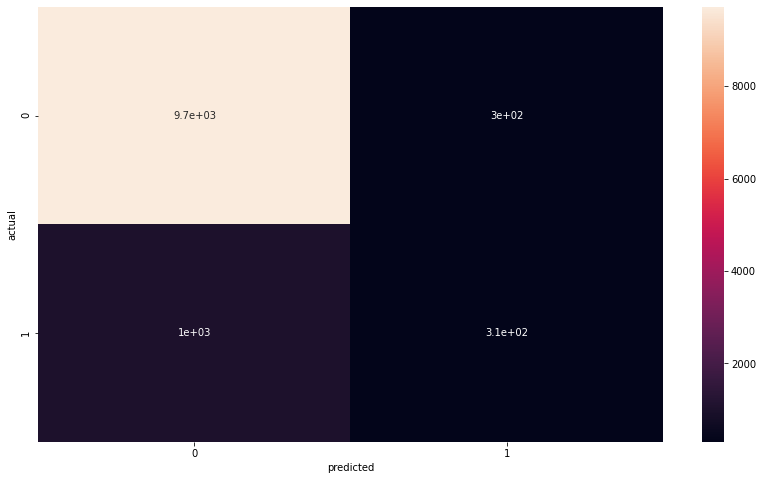

In [39]:
plt.figure(figsize=(14,8))
sns.heatmap(conmat,annot=True)
plt.xlabel("predicted")
plt.ylabel('actual')

True Positive Rate

In [40]:
307/(307+300)

0.5057660626029654

True Negative Rate

In [41]:
9716/(9716+1018)

0.9051611701136575

My basic random forest classification model, was not successful in predicting the conversion of clients to deposits, using age and consumer price index. With only a 50% success rate at predicting actual deposits.